pandas, numpy: for data manipulation

matplotlib, seaborn: for plotting graphs

tensorflow.keras: to build neural networks

sklearn: for splitting the data and preprocessing

In [1]:
# Install required libraries (optional in Colab)
!pip install pandas scikit-learn matplotlib seaborn tensorflow --quiet

# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Upload your CSV file to Colab
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data.csv


In [3]:
# Load it
df = pd.read_csv('car data.csv')  # Replace with the actual name
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


You're converting categorical string data into numbers using LabelEncoder, which assigns a unique number to each category.


X = inputs (features)

y = output (car price you want to predict)

Splits the dataset into 80% training and 20% testing.

Normalizes the data so all features are on the same scale (important for neural networks).

In [4]:
# Check for nulls
print(df.isnull().sum())

# Display column names
print(df.columns)

# Encode categorical columns
le = LabelEncoder()
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])   # Dealer/Individual
df['Transmission'] = le.fit_transform(df['Transmission']) # Manual/Automatic
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])       # Petrol/Diesel/CNG
df['Car_Name'] = le.fit_transform(df['Car_Name'])         # Encode car names

# Target and feature selection
X = df[['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


Input layer: 128 neurons

Hidden layers: 64 and 32 neurons

Dropout: helps prevent overfitting

Output layer: 1 neuron (because it’s a regression task)
*********
Adam optimizer for efficient training

MSE (Mean Squared Error) as loss function

MAE (Mean Absolute Error) as additional evaluation metric

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 44.1156 - mae: 4.2638 - val_loss: 35.3071 - val_mae: 4.2580
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.6576 - mae: 2.8036 - val_loss: 23.3995 - val_mae: 3.3584
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34.2748 - mae: 3.0896 - val_loss: 10.7373 - val_mae: 2.1682
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.0745 - mae: 2.3681 - val_loss: 5.3052 - val_mae: 1.5615
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2870 - mae: 1.8060 - val_loss: 3.3300 - val_mae: 1.2431
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4002 - mae: 1.7137 - val_loss: 2.9862 - val_mae: 1.2377
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5751 - mae: 1.5630 - val_loss: 2.5643 - val_mae: 1.1792
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2629 - mae: 1.3400 - val_loss: 2.8587 - val_mae: 1.2158
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

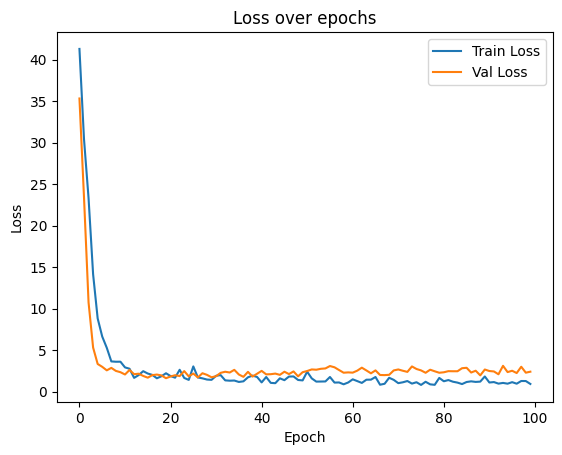

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4795 - mae: 0.4856 
Test MAE: ₹0.49


In [7]:
# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: ₹{mae:.2f}")


In [8]:
# Predict on test set
predictions = model.predict(X_test).flatten()

# Display actual vs predicted prices
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(comparison.head(10))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
   Actual  Predicted
0    0.35   0.227041
1   10.11  10.527217
2    4.95   4.909638
3    0.15   0.289115
4    6.95   7.889209
5    7.45   6.369195
6    1.10   0.777786
7    0.50   0.817769
8    0.45   0.827271
9    6.00   6.443377


In [9]:
# Save model
model.save("car_price_model.keras")


In [10]:
loaded_model = tf.keras.models.load_model("car_price_model.keras")

In [11]:
# Example input: [Car_Name, Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]
new_car = np.array([[10, 2017, 5.59, 27000, 1, 0, 1, 0]])  # Dummy example
new_car_scaled = scaler.transform(new_car)

predicted_price = model.predict(new_car_scaled)
print(f"Predicted Price: ₹{predicted_price[0][0]:,.2f} Lakh")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Price: ₹4.74 Lakh


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
